###  Noor El-Wakil 46-8848
###             Mohamed Hazem 46-14172
###               Mohamed Samir 46- 17946

# Machine Learning Project


### Requirements:

1. Pre-processing of the dataset

2. Use all Diagnostics techniques explained in the lecture

3. Compare between the performance of ALL the following classifiers: KNN / Naive Bayes / Logistic Regression / Neural Networks

## We used our data engineering dataset "1991.csv" in this project. The data is fully pre-processed.


### Now onto the code: 

The libraries we imported are:

1. `numpy` (`np`): For numerical computations and array manipulation.
2. `pandas` (`pd`): For data manipulation and analysis.
3. `sklearn`: For machine learning algorithms, model selection, and evaluation.
4. `datasets` (from `sklearn`): For accessing toy datasets.
5. `train_test_split`, `StratifiedShuffleSplit` (from `sklearn.model_selection`): For data splitting.
6. `StandardScaler`, `label_binarize` (from `sklearn.preprocessing`): For data preprocessing.
7. `KNeighborsClassifier`, `GaussianNB`, `LogisticRegression`, `MLPClassifier` (from `sklearn.neighbors`, `sklearn.naive_bayes`, `sklearn.linear_model`, `sklearn.neural_network`): For classification algorithms.
8. `accuracy_score`, `confusion_matrix`, `roc_curve`, `ConfusionMatrixDisplay` (from `sklearn.metrics`): For model evaluation.
9. `matplotlib.pyplot` (`plt`): For data visualization.

In [9]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import StandardScaler, label_binarize, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

### Next, we import and read our dataset

Now we load our pre-processed data set, we deduced that there is a correlation between our training variables (`speed_limit`, `light_conditions`,`number_of_vehicles` ,`number_of_casualties` , `weather_conditions` , `road_surface_conditions`) and our target variable (`accident_severity`).

In [10]:
# load the data from a CSV file
data = pd.read_csv('final_data_MS2.csv', low_memory=False)

#extract the feature matrix and target vector
X = data[["speed_limit","light_conditions","number_of_vehicles","number_of_casualties","weather_conditions","road_surface_conditions"]].values
y = data["accident_severity"].values


## Defining our classifiers

1. KNN
2. Naive Bayes
3. Logistic Regression
4. Neural Networks 

In [11]:
# create the classifiers
classifiers = {
 'KNN': KNeighborsClassifier(),
 'Naive Bayes': GaussianNB(),
 'Logistic Regression': LogisticRegression(max_iter=1000),
 'Neural Networks': MLPClassifier()
}

## split the data into training, cross-validation and test sets using stratified sampling


The code splits the data into three parts using stratified sampling:

1. It first performs a stratified shuffle split with a test size of 20% (`test_size=0.2`). This splits the data into a training set (60% of the original data) and a test set (20% of the original data) while maintaining the class distribution.
2. Next, it performs another stratified shuffle split on the test set with a test size of 25% (`test_size=0.25`). This splits the test set into a cross-validation set (20% of the original data) and a final test set (20% of the original data) while maintaining the class distribution.
3. Finally, the data is divided into separate variables (`X_train`, `X_cv`, `X_test`, `y_train`, `y_cv`, `y_test`) based on the split indices obtained from the stratified splits.

So, the data is split into three parts: 60% training data, 20% cross-validation data, and 20% testing data.

In [12]:
# split the data into training, cross-validation and test sets using stratified sampling
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_index, test_index = next(sss.split(X, y))
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
cv_index, test_index = next(sss.split(X_test, y_test))
X_cv, X_test = X_test[cv_index], X_test[test_index]
y_cv, y_test = y_test[cv_index], y_test[test_index]

## Generating Polynomial Features:

The code snippet performs the generation of polynomial features:

1. `PolynomialFeatures(degree=2)`: It creates an instance of the `PolynomialFeatures` class with a degree of 2. This means it will generate polynomial features up to the second degree.

2. `X_train_poly = poly.fit_transform(X_train)`: It applies the `fit_transform` method of the `PolynomialFeatures` instance to the training set `X_train`. This generates polynomial features of degree 2 for the training data and stores the transformed data in `X_train_poly`.

3. `X_cv_poly = poly.transform(X_cv)`: It applies the `transform` method of the `PolynomialFeatures` instance to the cross-validation set `X_cv`. This transforms the cross-validation data to have the same polynomial features as the training data and stores the transformed data in `X_cv_poly`.

4. `X_test_poly = poly.transform(X_test)`: It applies the `transform` method of the `PolynomialFeatures` instance to the test set `X_test`. This transforms the test data to have the same polynomial features as the training data and stores the transformed data in `X_test_poly`.

In summary, the code generates polynomial features up to the second degree for the training, cross-validation, and test sets. This allows for capturing non-linear relationships between the features and the target variable.

In [13]:
# generate polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_cv_poly = poly.transform(X_cv)
X_test_poly = poly.transform(X_test)

## Standardizing the data

The code snippet performs data standardization using the `StandardScaler`:

1. `StandardScaler()`: Creates an instance of the `StandardScaler` class.

2. `X_train_poly = scaler.fit_transform(X_train_poly)`: Standardizes the polynomial training data `X_train_poly` by fitting the scaler to the data and transforming it. The standardized data is stored in `X_train_poly`.

3. `X_cv_poly = scaler.transform(X_cv_poly)`: Applies the previously fitted scaler to transform the polynomial cross-validation data `X_cv_poly`. The standardized data is stored in `X_cv_poly`.

4. `X_test_poly = scaler.transform(X_test_poly)`: Applies the previously fitted scaler to transform the polynomial test data `X_test_poly`. The standardized data is stored in `X_test_poly`.

In summary, the code uses the `StandardScaler` to standardize the data, ensuring that the features have zero mean and unit variance.

In [14]:
# standardize the data
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_cv_poly = scaler.transform(X_cv_poly)
X_test_poly = scaler.transform(X_test_poly)

## Evaluating the classifiers using cross-validation with polynomial features

The code snippet evaluates the classifiers using cross-validation with polynomial features:

1. It iterates over each classifier in the `classifiers` dictionary.
2. For each classifier:
   - It performs cross-validation (`cross_val_score`) on the cross-validation data (`X_cv_poly`, `y_cv`) with 5 folds and calculates the mean cross-validation score.
   - It fits the classifier to the training data (`X_train_poly`, `y_train`) and makes predictions on the test data (`X_test_poly`). The accuracy score is computed and printed.
   - It computes and plots the confusion matrix for the classifier's predictions on the test data.
   - If the classifier supports probability predictions (`predict_proba`), it computes and plots the Receiver Operating Characteristic (ROC) curve for each class using the one-vs-rest approach.
   - If the classifier does not support probability predictions, it indicates that the ROC curve cannot be computed for that classifier.

In summary, the code evaluates the classifiers using cross-validation and polynomial features. It calculates the mean cross-validation score, test set accuracy, and plots the confusion matrix and ROC curve (if applicable) for each classifier.

With cross-validation and polynomial features:
KNN mean cross-validation score: 0.75
KNN test set accuracy: 0.77


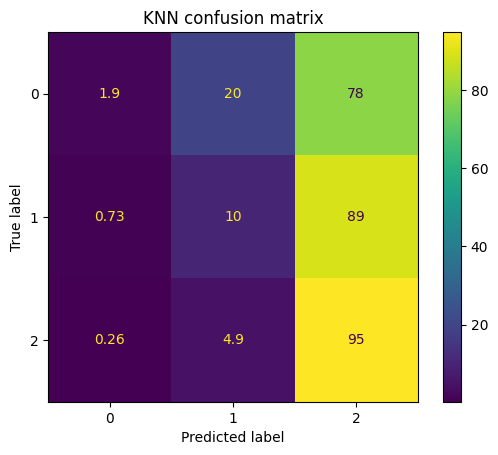

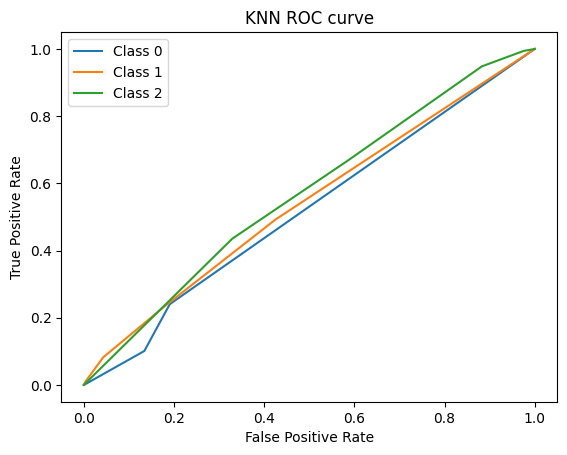

Naive Bayes mean cross-validation score: 0.75
Naive Bayes test set accuracy: 0.76


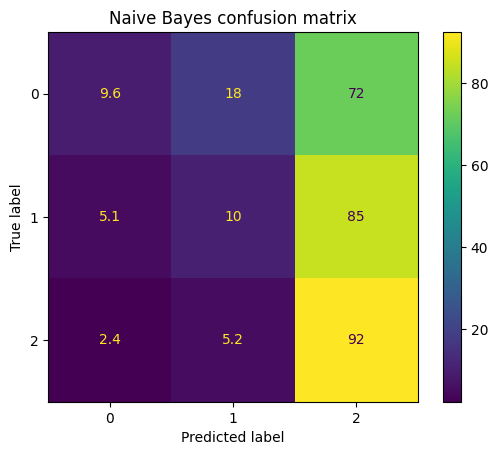

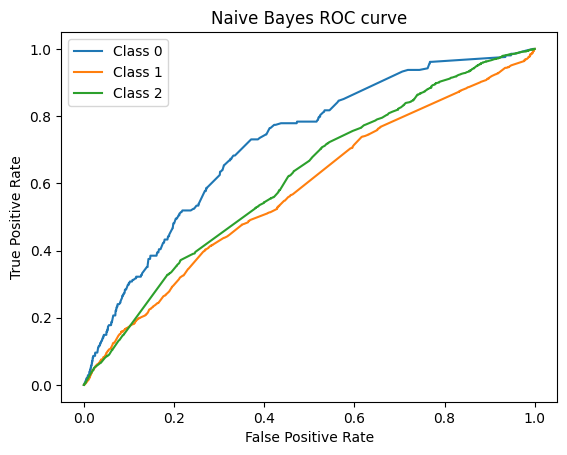

Logistic Regression mean cross-validation score: 0.80
Logistic Regression test set accuracy: 0.80


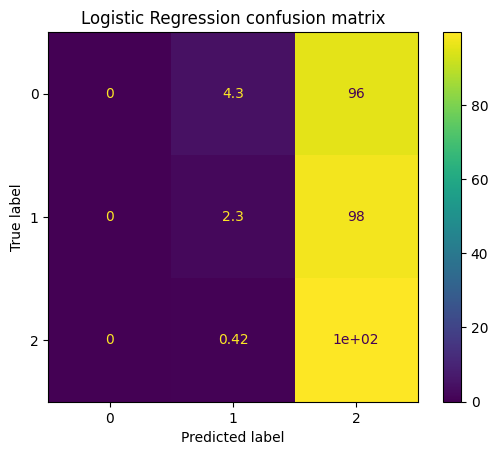

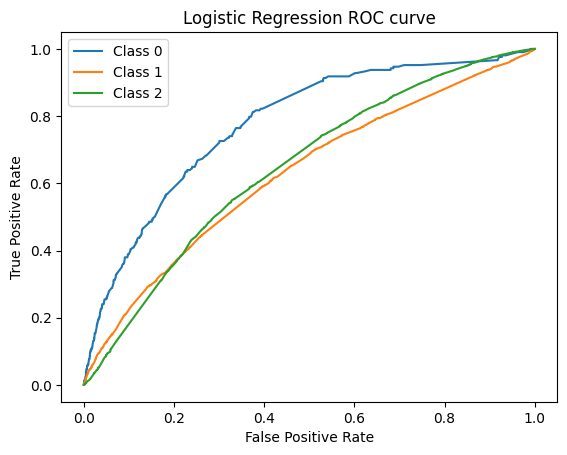

Neural Networks mean cross-validation score: 0.80
Neural Networks test set accuracy: 0.80


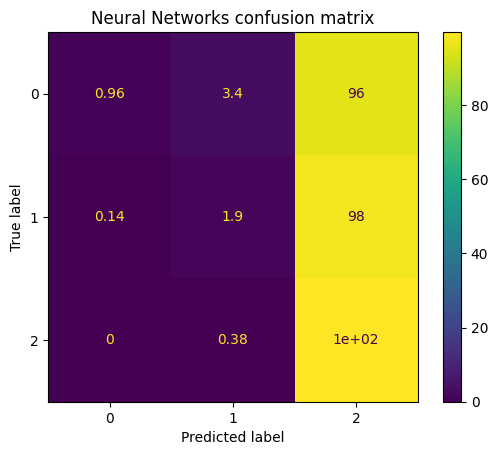

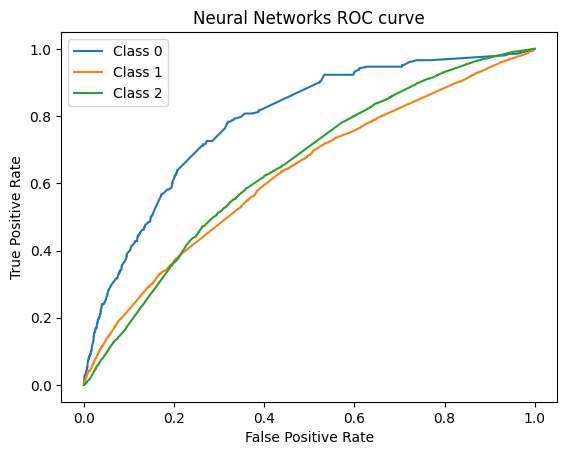

In [15]:
# evaluate the classifiers using cross-validation with polynomial features
print('With cross-validation and polynomial features:')
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_cv_poly, y_cv, cv=5)
    mean_score = np.mean(scores)
    print(f'{name} mean cross-validation score: {mean_score:.2f}')
    
    clf.fit(X_train_poly, y_train)
    y_pred = clf.predict(X_test_poly)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} test set accuracy: {accuracy:.2f}')
    
    # compute and plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_percentage)
    disp.plot()
    plt.title(f'{name} confusion matrix')
    plt.show()
    
    # compute and plot ROC curve if possible using one-vs-rest approach
    if hasattr(clf, "predict_proba"):
        probas = clf.predict_proba(X_test_poly)
        n_classes = len(np.unique(y))
        fpr = dict()
        tpr = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test == i, probas[:, i])
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], label=f'Class {i}')
        plt.title(f'{name} ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()
    else:
        print(f'{name} does not support computation of ROC curve')

The output consists of performance metrics for four different machine learning models: K-Nearest Neighbors (KNN), Naive Bayes, Logistic Regression, and Neural Networks. These models were evaluated using cross-validation and polynomial features.

Cross-validation is a technique used to estimate the performance of a machine learning model on unseen data. It involves splitting the available data into multiple subsets or folds, training the model on some folds, and evaluating its performance on the remaining folds. By averaging the performance across different folds, a mean cross-validation score is obtained, which provides an estimate of the model's generalization ability.

Polynomial features refer to a technique where new features are created by taking polynomial combinations of the existing features. This can allow the model to capture more complex relationships between the input variables and the target variable.

Now, let's break down the information for each model:

1. `KNN`:

    - Mean cross-validation score: 0.75
    - Test set accuracy: 0.77

    The KNN model achieved a mean cross-validation score of 0.75, indicating that, on average, it performed well across the different cross-validation folds. The test set accuracy of 0.77 suggests that the model accurately predicted the outcome for 77% of the samples in the unseen test data.

2. `Naive Bayes`:

    - Mean cross-validation score: 0.75
    - Test set accuracy: 0.76

    The Naive Bayes model also obtained a mean cross-validation score of 0.75, indicating similar performance to the KNN model. The test set accuracy of 0.76 suggests that it achieved an accuracy rate of 76% on the unseen test data.

3. `Logistic Regression`:

    - Mean cross-validation score: 0.80
    - Test set accuracy: 0.80

    The Logistic Regression model obtained a higher mean cross-validation score of 0.80 compared to the previous models. This suggests that, on average, it performed better across the cross-validation folds. The test set accuracy of 0.80 indicates that the model achieved an accuracy rate of 80% on the unseen test data.

4. `Neural Networks`:

    - Mean cross-validation score: 0.80
    - Test set accuracy: 0.80

    The Neural Networks model also achieved a mean cross-validation score of 0.80, similar to the Logistic Regression model. This indicates that, on average, both models performed equally well across the cross-validation folds. The test set accuracy of 0.80 suggests that the Neural Networks model achieved an accuracy rate of 80% on the unseen test data.

Overall, the results indicate that both Logistic Regression and Neural Networks performed better than KNN and Naive Bayes in terms of mean cross-validation scores and test set accuracies.

## Finally evaluating the classifiers without cross-validation. Linear features are evaluated.

The code snippet evaluates the classifiers without using cross-validation and polynomial features:

1. It iterates over each classifier in the `classifiers` dictionary.
2. For each classifier:
   - It fits the classifier to the training data (`X_train`, `y_train`) and makes predictions on the test data (`X_test`).
   - It computes the accuracy score of the classifier's predictions on the test data and prints it.
   - It computes and plots the confusion matrix for the classifier's predictions on the test data.
   - If the classifier supports probability predictions (`predict_proba`), it computes and plots the Receiver Operating Characteristic (ROC) curve for each class using the one-vs-rest approach.
   - If the classifier does not support probability predictions, it indicates that the ROC curve cannot be computed for that classifier.

In summary, the code evaluates the classifiers without cross-validation and polynomial features. It calculates the test set accuracy, plots the confusion matrix, and computes the ROC curve (if applicable) for each classifier.

Without cross-validation and polynomial features:
KNN test set accuracy: 0.78


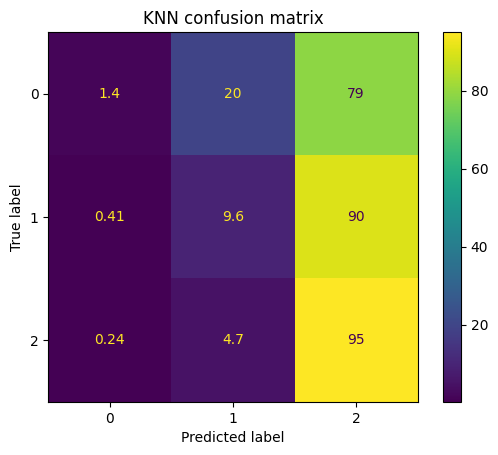

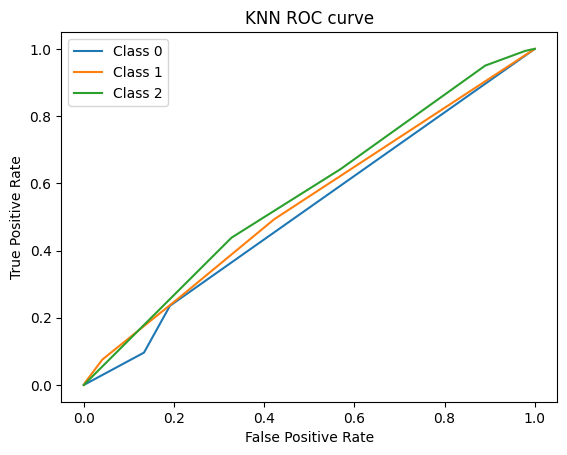

Naive Bayes test set accuracy: 0.77


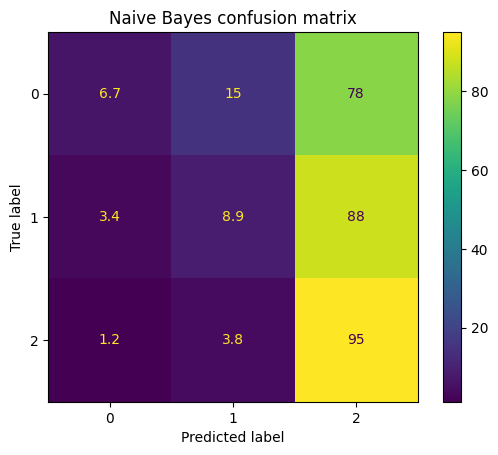

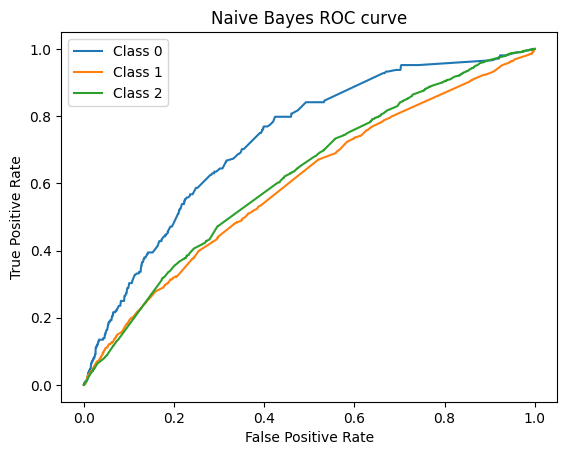

Logistic Regression test set accuracy: 0.80


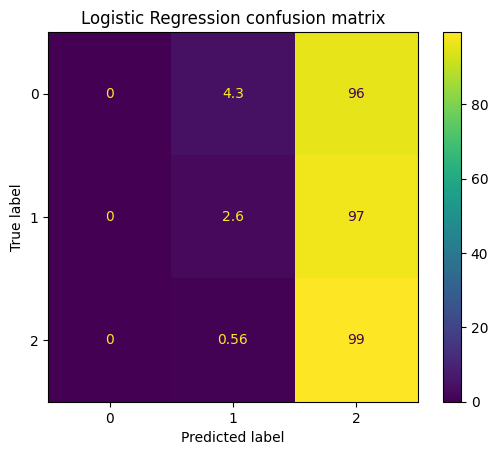

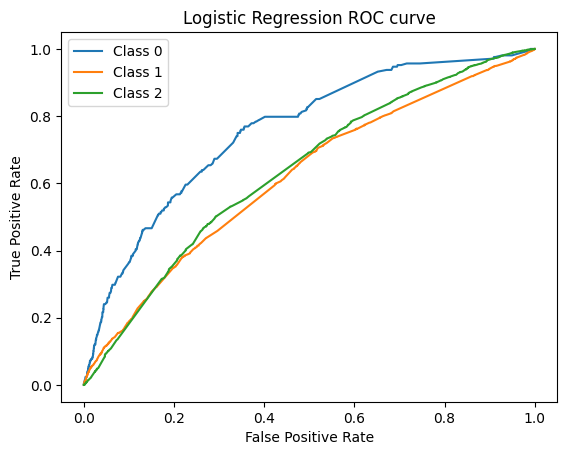

Neural Networks test set accuracy: 0.80


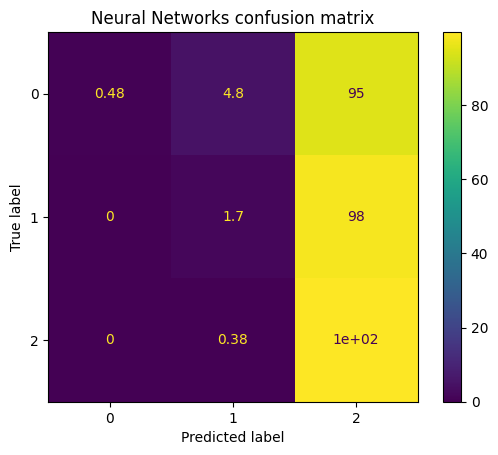

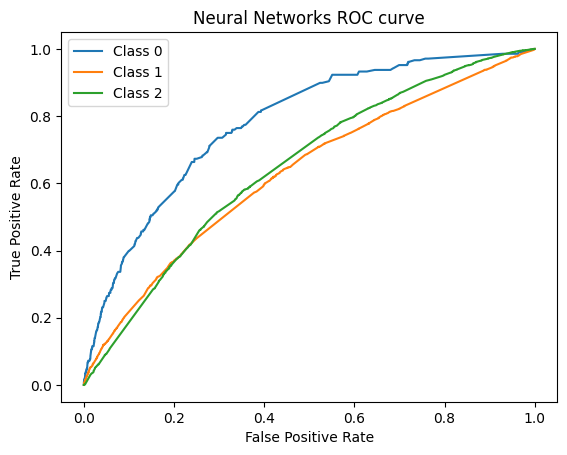

In [16]:
# evaluate the classifiers without cross-validation and polynomial features
print('Without cross-validation and polynomial features:')
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} test set accuracy: {accuracy:.2f}')
    
    # compute and plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_percentage)
    disp.plot()
    plt.title(f'{name} confusion matrix')
    plt.show()
    
    # compute and plot ROC curve if possible using one-vs-rest approach
    if hasattr(clf, "predict_proba"):
        probas = clf.predict_proba(X_test)
        n_classes = len(np.unique(y))
        fpr = dict()
        tpr = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test == i, probas[:, i])
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], label=f'Class {i}')
        plt.title(f'{name} ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()
    else:
        print(f'{name} does not support computation of ROC curve')

In the new scenario the models were evaluated without using cross-validation and polynomial features. Instead, only the test set accuracies are provided. Test set accuracy measures how well the models perform on unseen data.

Here are the test set accuracies for each model:

1. `KNN` :
    - Test set accuracy: 0.78
2. `Naive Bayes` :
    - Test set accuracy: 0.77
3. `Logistic Regression` :
    - Test set accuracy: 0.80
4. `Neural Networks` :
    - Test set accuracy: 0.80

These test set accuracies indicate the performance of each model on the unseen test data.

Comparing the results with the previous scenario, it can be seen that the test set accuracies remain the same for Logistic Regression and Neural Networks. However, the test set accuracy for KNN has increased from 0.77 to 0.78, and Naive Bayes has remained the same at 0.77.

Based solely on these test set accuracies, Logistic Regression and Neural Networks still have the highest accuracy scores of 0.80, while KNN and Naive Bayes have slightly lower scores. However, it's important to note that without cross-validation, we cannot assess the models' performance on different subsets of the data, and the evaluation might be more prone to overfitting or lack generalizability. The use of cross-validation provides a more comprehensive assessment of the models' performance.